#Gas Sensor Array using Flow Modulation

In [1]:
# Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn import tree,metrics
import seaborn as sns
import pydotplus
from IPython.display import Image
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor, export_graphviz 
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report
%matplotlib inline
plt.style.use('seaborn-white')

# Importing dataset 
ds = pd.read_csv ("features.csv").dropna()

ds.head()

,exp,batch,ace_conc,eth_conc,gas,lab,col,S1_max,S2_max,S3_max,...,S16_r4_Ahf,S16_r5_Ahf,S16_r6_Ahf,S16_r7_Ahf,S16_r8_Ahf,S16_r9_Ahf,S16_r10_Ahf,S16_r11_Ahf,S16_r12_Ahf,S16_r13_Ahf
0,100,day-1-morning,0.0,0.0,air,air,252525,0.00000,0.00000,0.00024,...,0.00012,0.00015,0.00003,-0.00002,0.00024,0.00006,0.00011,0.00003,-0.00019,-0.00006
1,101,day-1-morning,0.0,0.1,ethanol,eth-0.1,BDD7E7,0.09353,0.09985,0.08644,...,0.00085,0.00082,0.00056,0.00040,0.00017,0.00025,0.00044,0.00040,0.00032,0.00028
2,102,day-1-morning,0.0,1.0,ethanol,eth-1,2171B5,0.50816,0.57592,1.09707,...,0.01454,0.01196,0.00987,0.00673,0.00526,0.00447,0.00322,0.00257,0.00209,0.00235
3,103,day-1-morning,0.3,0.0,acetone,ace-0.3,FB6A4A,0.15799,0.17418,1.72519,...,0.00128,0.00077,0.00060,0.00053,0.00059,0.00004,0.00040,0.00008,0.00030,-0.00018
4,104,day-1-morning,0.3,0.1,mixture,ace-0.3-eth-0.1,E6AB02,0.29630,0.33535,2.80726,...,0.00344,0.00285,0.00226,0.00179,0.00192,0.00167,0.00087,0.00077,0.00081,0.00086


In [2]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 57
Columns: 439 entries, exp to S16_r13_Ahf
dtypes: float64(434), int64(1), object(4)
memory usage: 199.4+ KB


In [3]:
ds.describe()

,exp,ace_conc,eth_conc,S1_max,S2_max,S3_max,S4_max,S5_max,S6_max,S7_max,...,S16_r4_Ahf,S16_r5_Ahf,S16_r6_Ahf,S16_r7_Ahf,S16_r8_Ahf,S16_r9_Ahf,S16_r10_Ahf,S16_r11_Ahf,S16_r12_Ahf,S16_r13_Ahf
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,...,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,138.034483,0.191379,0.215517,0.267068,0.268111,1.588729,0.888891,0.316236,0.148561,0.269266,...,0.003232,0.002784,0.002293,0.001899,0.001641,0.001332,0.001256,0.001077,0.000993,0.000888
std,22.989674,0.297525,0.332350,0.204389,0.200279,1.549606,0.668273,0.242989,0.110827,0.193238,...,0.003626,0.003225,0.002664,0.002127,0.001856,0.001530,0.001364,0.001291,0.001023,0.000951
min,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.000260,-0.000120,-0.000180,-0.000500,-0.000170,-0.000210,-0.000140,-0.000350,-0.000190,-0.000290
25%,120.250000,0.000000,0.000000,0.118510,0.118565,0.267767,0.387125,0.144055,0.069225,0.125050,...,0.000852,0.000663,0.000530,0.000425,0.000370,0.000275,0.000365,0.000213,0.000285,0.000260
50%,138.500000,0.100000,0.100000,0.230510,0.232130,1.333900,0.752390,0.269250,0.131315,0.242390,...,0.001895,0.001790,0.001350,0.001180,0.001100,0.000820,0.000805,0.000700,0.000625,0.000670
75%,156.750000,0.300000,0.300000,0.348325,0.347058,2.187045,1.105635,0.410810,0.202730,0.347180,...,0.003830,0.003513,0.002945,0.002300,0.001900,0.001722,0.001650,0.001468,0.001388,0.001180
max,181.000000,1.000000,1.000000,0.779600,0.741200,6.129760,2.416290,0.937160,0.465350,0.726680,...,0.014540,0.014480,0.011010,0.009750,0.008150,0.006320,0.005520,0.005330,0.004530,0.003540


In [4]:
X = ds.iloc[:,7:]
X.head()

,S1_max,S2_max,S3_max,S4_max,S5_max,S6_max,S7_max,S8_max,S9_max,S10_max,...,S16_r4_Ahf,S16_r5_Ahf,S16_r6_Ahf,S16_r7_Ahf,S16_r8_Ahf,S16_r9_Ahf,S16_r10_Ahf,S16_r11_Ahf,S16_r12_Ahf,S16_r13_Ahf
0,0.00000,0.00000,0.00024,0.00205,0.00000,0.00000,0.00001,0.00226,0.00000,0.00000,...,0.00012,0.00015,0.00003,-0.00002,0.00024,0.00006,0.00011,0.00003,-0.00019,-0.00006
1,0.09353,0.09985,0.08644,0.38398,0.12024,0.05778,0.09442,0.29945,0.23588,0.27795,...,0.00085,0.00082,0.00056,0.00040,0.00017,0.00025,0.00044,0.00040,0.00032,0.00028
2,0.50816,0.57592,1.09707,2.01961,0.61340,0.25464,0.47139,1.50014,1.26901,2.02560,...,0.01454,0.01196,0.00987,0.00673,0.00526,0.00447,0.00322,0.00257,0.00209,0.00235
3,0.15799,0.17418,1.72519,0.61350,0.18424,0.09431,0.16993,0.48373,0.33542,0.71068,...,0.00128,0.00077,0.00060,0.00053,0.00059,0.00004,0.00040,0.00008,0.00030,-0.00018
4,0.29630,0.33535,2.80726,1.16391,0.34800,0.17003,0.31224,0.89387,0.73957,1.34971,...,0.00344,0.00285,0.00226,0.00179,0.00192,0.00167,0.00087,0.00077,0.00081,0.00086


In [5]:
y = ds['gas']
y.head()

0        air
1    ethanol
2    ethanol
3    acetone
4    mixture
Name: gas, dtype: object

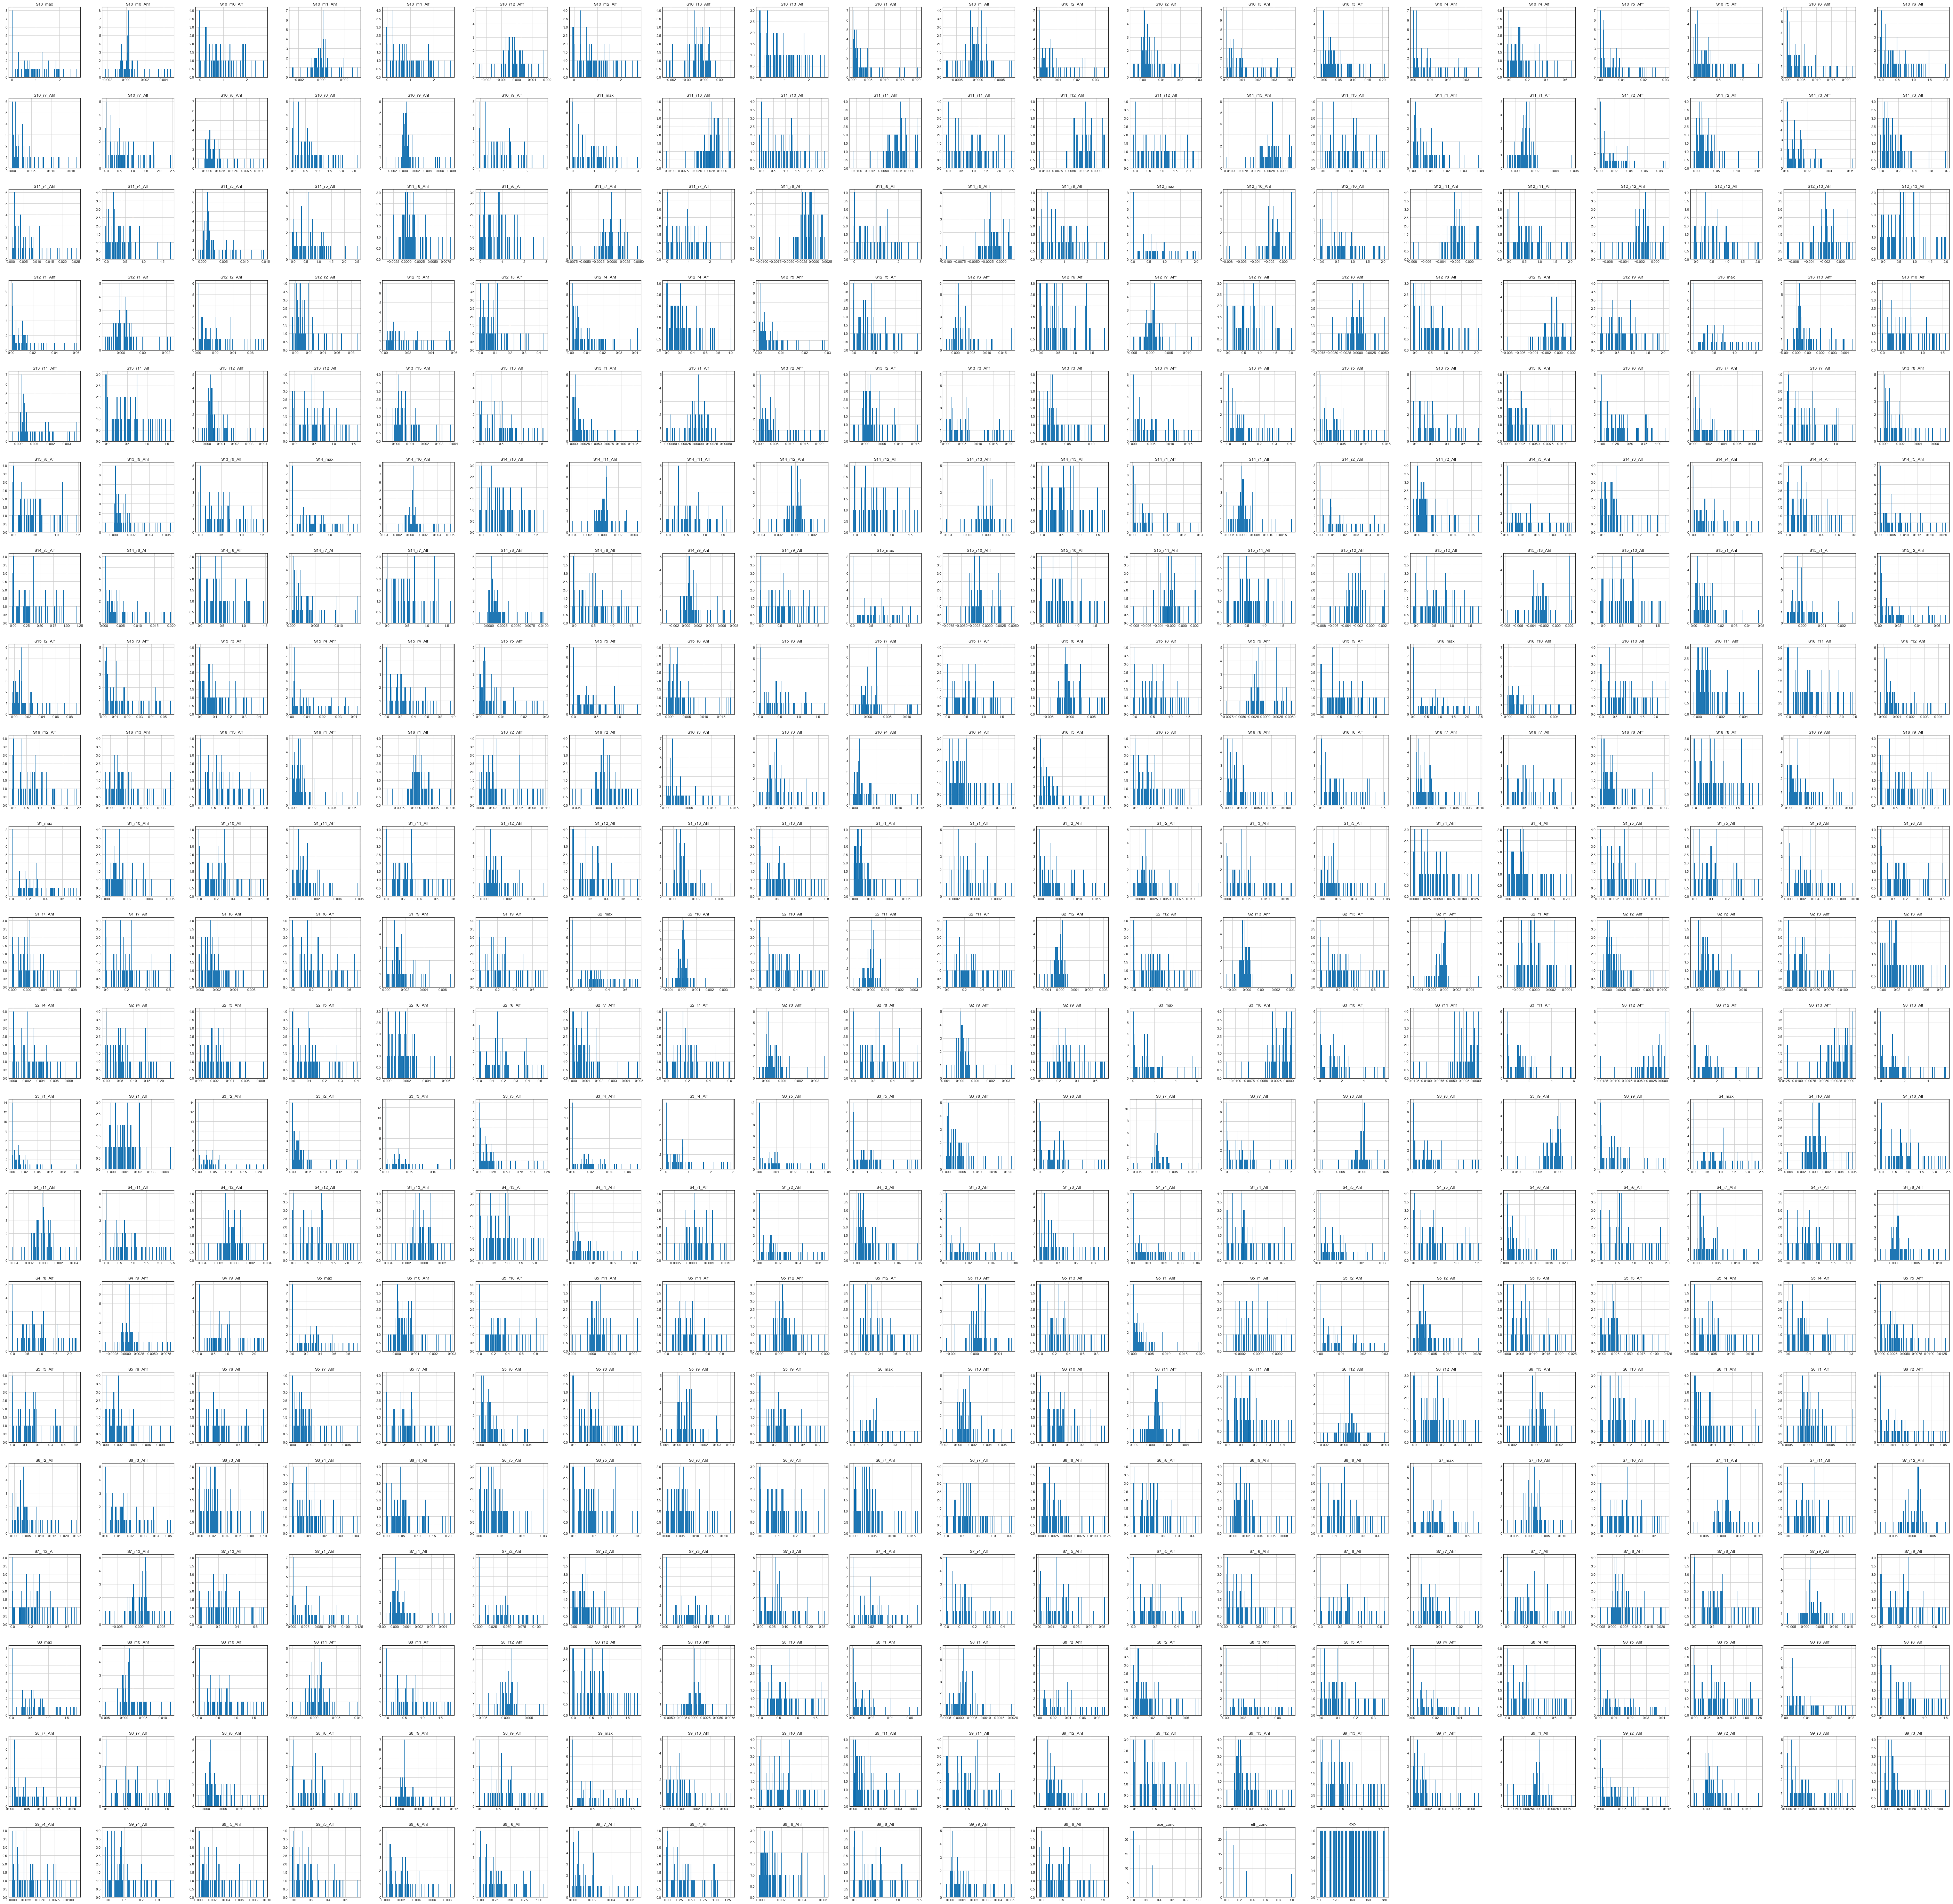

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
ds.hist(bins = 100, figsize = (100,100))
plt.show()

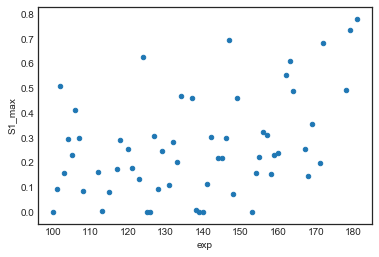

In [7]:
ds.plot(kind="scatter", x="exp", y="S1_max")

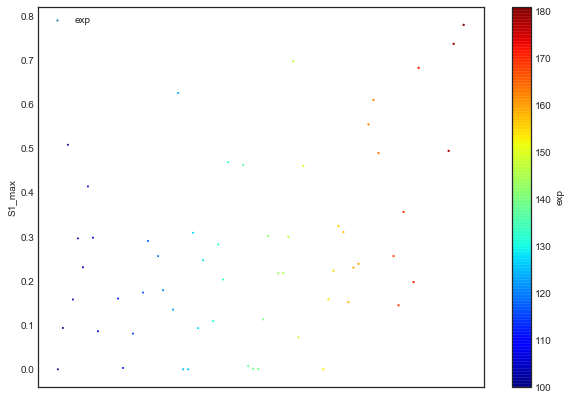

In [8]:
ds.plot(kind="scatter", x="exp", y="S1_max", alpha=0.9,
s=ds["exp"]/100, label="exp", figsize=(10,7),
c="exp", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

In [9]:
cor_matrix = ds.corr()
cor_matrix["exp"].sort_values(ascending=False)

exp            1.000000
S6_r8_Alf      0.440661
S6_r7_Alf      0.440442
S6_r9_Alf      0.439578
S6_r10_Alf     0.438139
S6_r6_Alf      0.437765
S6_r11_Alf     0.436974
S6_max         0.436609
S6_r6_Ahf      0.436204
S6_r12_Alf     0.436135
S1_r11_Ahf     0.435817
S6_r13_Alf     0.435460
S6_r5_Ahf      0.431327
S6_r5_Alf      0.430560
S1_r13_Ahf     0.430436
S1_r10_Ahf     0.429194
S6_r4_Ahf      0.428579
S6_r3_Ahf      0.425624
S13_r9_Ahf     0.423879
S1_r7_Ahf      0.421357
S1_r8_Ahf      0.420734
S6_r4_Alf      0.415977
S1_r6_Ahf      0.415539
S1_r9_Ahf      0.415364
S9_r8_Ahf      0.414160
S1_r13_Alf     0.413702
S5_r13_Alf     0.413599
S1_r12_Alf     0.413439
S1_r11_Alf     0.413312
S5_r12_Alf     0.413306
                 ...   
S11_r11_Alf   -0.028250
S3_r10_Ahf    -0.031932
S11_r10_Alf   -0.039213
S11_r5_Ahf    -0.041442
S11_r9_Alf    -0.052313
S15_r12_Ahf   -0.055228
S12_r7_Ahf    -0.056036
S11_max       -0.062689
S12_r9_Ahf    -0.063612
S15_r13_Ahf   -0.066041
S11_r8_Alf    -0

C:\Users\deepa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D220EC6BE0>,
      dtype=object)

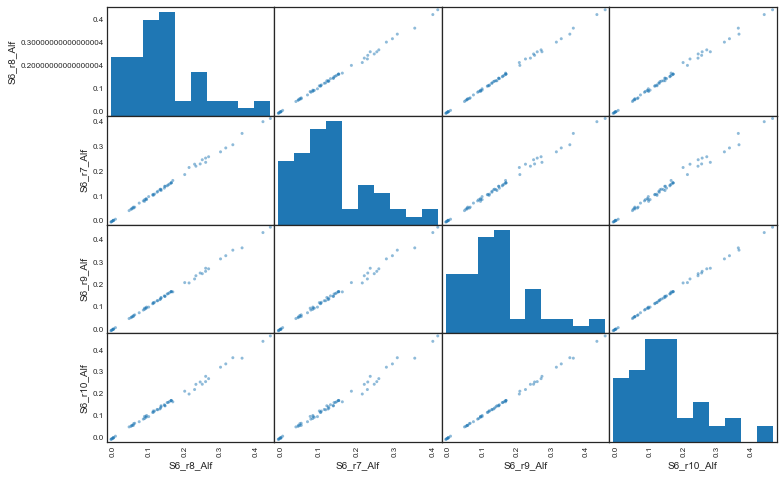

In [10]:
from pandas.tools.plotting import scatter_matrix
attributes = ["S6_r8_Alf", "S6_r7_Alf", "S6_r9_Alf","S6_r10_Alf"]
scatter_matrix(ds[attributes], figsize=(12, 8))

In [11]:
from scipy import stats

z = np.abs(stats.zscore(X))
print(z)

[[1.31808046 1.35037915 1.034045   ... 0.81805507 1.16613849 1.00521995]
 [0.85647541 0.8474705  0.97793214 ... 0.5290287  0.66345157 0.6445406 ]
 [1.1898766  1.55032339 0.32005116 ... 1.16607191 1.08116774 1.5513602 ]
 ...
 [1.1216698  1.076728   1.67723468 ... 0.34586194 0.06219858 0.09291334]
 [2.31795387 2.25414367 0.46496906 ... 3.29861784 3.48617967 2.81373795]
 [2.52953313 2.38277949 0.29272471 ... 1.04889906 1.27829987 0.50114678]]


In [12]:
threshold = 3
print(np.where(z > threshold))

(array([ 2,  2,  2,  2,  2,  2,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 26, 27, 27, 27, 27, 27, 27, 27, 27,
       27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 36, 36, 36, 36,
       36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36,
       36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36,
       36, 36, 36, 36, 36, 36, 37, 37, 47, 47, 47, 47, 47, 47, 48, 48, 48,
       48, 49, 49, 49, 49, 49, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54,
       54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54,
       54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54,
       54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 56, 56, 56, 56, 56, 56,
       56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56,
       56, 56, 56, 56, 5

In [13]:
ds1 = X[(z < 3).all(axis=1)]
ds1.shape   # Feature dataset after handling outliers

(45, 432)

In [14]:
X.shape  # Feature dataset before handling outliers

(58, 432)

In [15]:
from sklearn.decomposition import PCA
pca1 = PCA()
principalComponents = pca1.fit_transform(X)


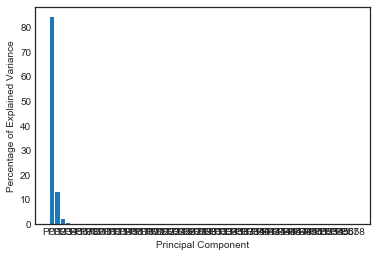

In [16]:
a = np.round(pca1.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(a)+1)]
 
plt.bar(x=range(1,len(a)+1), height=a, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.show()

In [17]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(X)
prin = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
print(prin)

    principal component 1  principal component 2
0               -8.282622              -0.924937
1               -6.080337               0.688309
2                6.151877               6.879698
3               -0.789134              -1.642180
4                5.070927              -1.016956
5               -3.976244               1.963836
6               11.767695              -3.192398
7                0.299919               0.808515
8               -4.494836              -1.467192
9               -0.998089              -2.443015
10              -8.071129              -1.121694
11              -6.664263              -0.094048
12              -3.044304              -0.680827
13              -1.620306               2.493111
14               1.908934              -1.314985
15              -0.010973              -1.201036
16              -2.832452              -1.498243
17               6.672180               6.668175
18              -8.350451              -1.240072
19              -8.5

In [18]:
finalDS = pd.concat([prin, ds['gas']], axis = 1)

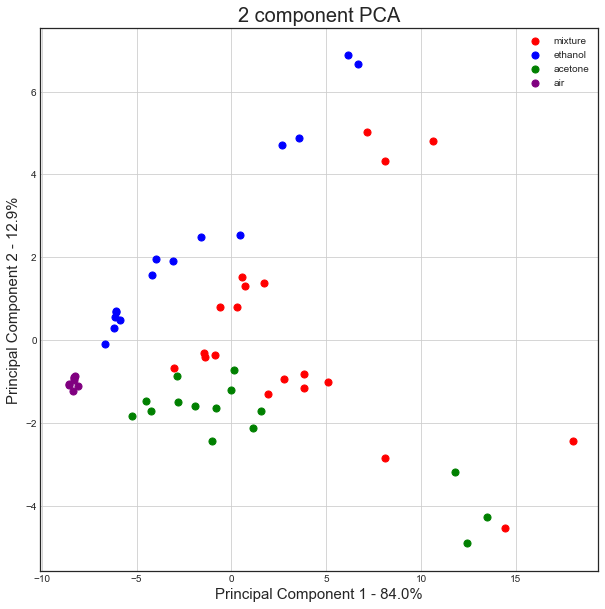

In [19]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1 - {0}%'.format(a[0]), fontsize = 15)
ax.set_ylabel('Principal Component 2 - {0}%'.format(a[1]), fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
gases = ['mixture', 'ethanol', 'acetone','air']
colors = ['red', 'blue', 'green', 'purple']
for gas, color in zip(gases,colors):
    indicesToKeep = finalDS['gas'] == gas
    ax.scatter(finalDS.loc[indicesToKeep, 'principal component 1']
               , finalDS.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(gases)
ax.grid()

In [20]:
pca.explained_variance_ratio_

array([0.8395096, 0.1291241])

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
y2 = pd.factorize(ds.gas)[0]

In [23]:
from sklearn.preprocessing import StandardScaler

# Seperating X, y into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.25, random_state = 42)

# Standardizing the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [24]:
#fitting logistic regression to the dataset
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
# Predicting the Test set results
y_pred = lr.predict(X_test)
y_pred

array([0, 1, 2, 1, 1, 3, 2, 2, 2, 2, 3, 2, 3, 1, 2], dtype=int64)

In [26]:
# Accuracy for the predicted value 
from sklearn.metrics import accuracy_score
print ("Accuracy = ",  accuracy_score(y_test,y_pred)*100)

Accuracy =  80.0


In [27]:
#confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred).T, index=['air', 'ethanol','acetone','mixture'], columns=['air', 'ethanol','acetone','mixture'])
cm.index.name = 'Predicted'
cm.columns.name = 'Gas'
cm

Gas,air,ethanol,acetone,mixture
Predicted,,,,
air,1,0,0,0
ethanol,0,4,0,0
acetone,0,0,5,2
mixture,0,1,0,2


In [28]:
print ('Root_Mean_Squared_Error : ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Root_Mean_Squared_Error :  0.6324555320336759


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      0.80      0.89         5
           2       0.71      1.00      0.83         5
           3       0.67      0.50      0.57         4

   micro avg       0.80      0.80      0.80        15
   macro avg       0.85      0.82      0.82        15
weighted avg       0.82      0.80      0.79        15



In [30]:
from sklearn.svm import SVC

In [31]:
# training a linear SVM classifier

svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)
svm_predictions

array([0, 1, 2, 3, 1, 3, 2, 2, 2, 2, 3, 2, 3, 1, 2], dtype=int64)

In [32]:
# model accuracy for the predicted value   
print ("Accuracy is",  accuracy_score(y_test,svm_predictions)*100)

Accuracy is 73.33333333333333


In [33]:
y_test

array([0, 1, 2, 1, 1, 3, 2, 3, 2, 3, 1, 2, 3, 1, 2], dtype=int64)

In [34]:
cm = pd.DataFrame(confusion_matrix(y_test, svm_predictions).T, index=['air', 'ethanol','acetone','mixture'], columns=['air', 'ethanol','acetone','mixture'])
cm.index.name = 'Predicted'
cm.columns.name = 'Gas'
cm

Gas,air,ethanol,acetone,mixture
Predicted,,,,
air,1,0,0,0
ethanol,0,3,0,0
acetone,0,0,5,2
mixture,0,2,0,2


In [35]:
print ('Root_Mean_Squared_Error : ', np.sqrt(metrics.mean_squared_error(y_test,svm_predictions)))

Root_Mean_Squared_Error :  0.816496580927726


In [36]:
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5
           3       0.50      0.50      0.50         4

   micro avg       0.73      0.73      0.73        15
   macro avg       0.80      0.78      0.77        15
weighted avg       0.77      0.73      0.73        15



In [37]:
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return(graph)

In [38]:
clf = DecisionTreeClassifier(max_depth=6)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

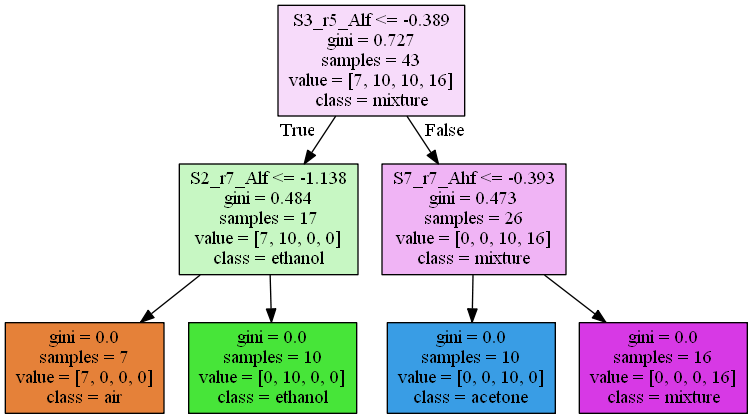

In [39]:
# Plot the tree
import pydotplus
from IPython.display import Image
graph = print_tree(clf, features=X.columns.values , class_names=['air', 'ethanol','acetone','mixture'])
Image(graph.create_png())

In [40]:
#fitting the model
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred

array([0, 1, 2, 1, 1, 3, 2, 3, 2, 3, 3, 2, 3, 0, 2], dtype=int64)

In [41]:
#confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, pred).T, index=['air', 'ethanol','acetone','mixture'], columns=['air', 'ethanol','acetone','mixture'])
cm.index.name = 'Predicted'
cm.columns.name = 'Gas'
cm

Gas,air,ethanol,acetone,mixture
Predicted,,,,
air,1,1,0,0
ethanol,0,3,0,0
acetone,0,0,5,0
mixture,0,1,0,4


In [42]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.60      0.75         5
           2       1.00      1.00      1.00         5
           3       0.80      1.00      0.89         4

   micro avg       0.87      0.87      0.87        15
   macro avg       0.82      0.90      0.83        15
weighted avg       0.91      0.87      0.86        15



In [43]:
from sklearn.metrics import accuracy_score
print ("Accuracy is",  accuracy_score(y_test,pred)*100)

Accuracy is 86.66666666666667


In [44]:
print ('Test MSE: ', mean_squared_error(y_test, clf.predict(X_test)))

Test MSE:  0.3333333333333333


In [45]:
print ('Root_Mean_Squared_Error : ', np.sqrt(metrics.mean_squared_error(y_test,pred)))

Root_Mean_Squared_Error :  0.5773502691896257


In [46]:
#using the principal component data to tune the model
X1 = prin
y1 = pd.factorize(ds.gas)[0]

In [47]:
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return(graph)

In [48]:
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X1, y1,test_size=0.25, random_state = 0)
# Standardizing the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [49]:
#fitting the model
dtf = DecisionTreeClassifier(max_depth=6)
dtf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

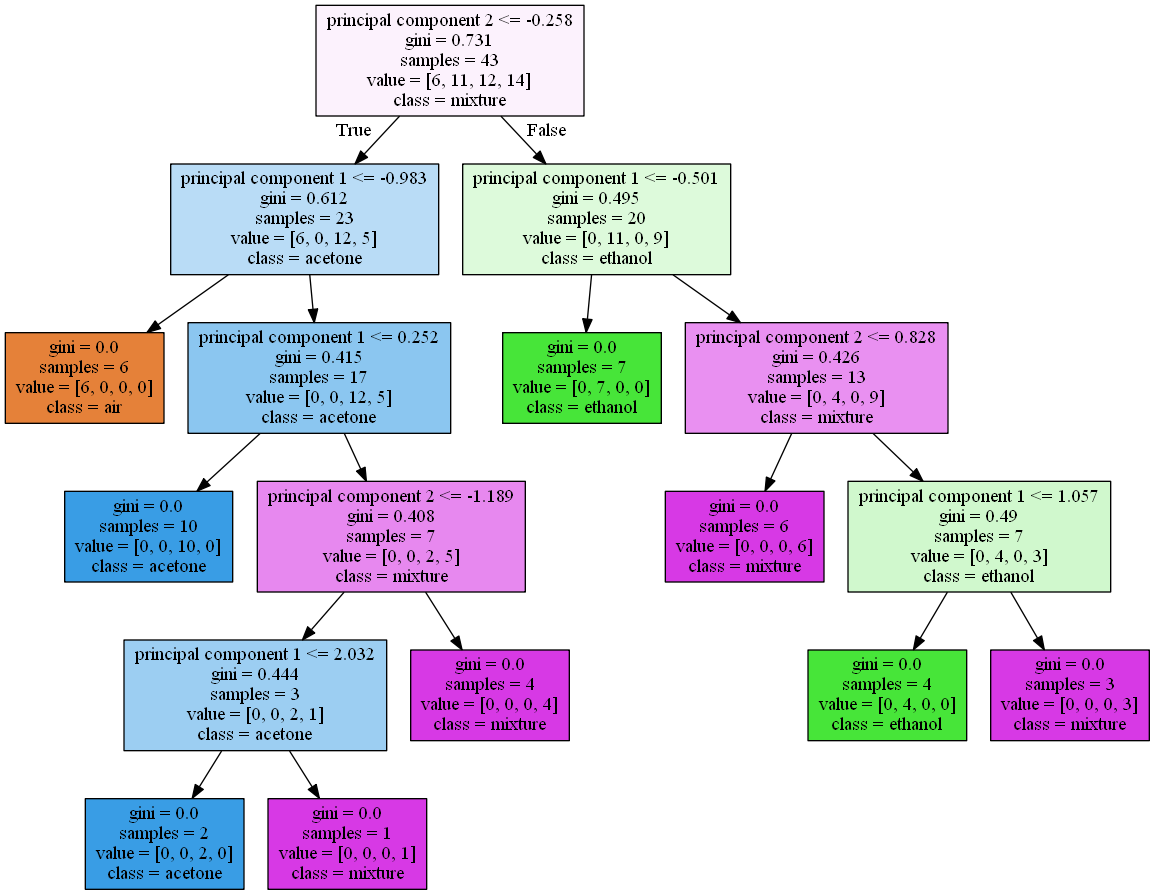

In [50]:
from IPython.display import Image
graph = print_tree(dtf, features=X1.columns.values , class_names=['air', 'ethanol','acetone','mixture'])
Image(graph.create_png())

In [51]:
#fitting the model
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred

array([3, 2, 3, 3, 1, 1, 3, 3, 1, 1, 3, 0, 0, 2, 3], dtype=int64)

In [52]:
#confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, pred).T, index=['air', 'ethanol','acetone','mixture'], columns=['air', 'ethanol','acetone','mixture'])
cm.index.name = 'Predicted'
cm.columns.name = 'Gas'
cm

Gas,air,ethanol,acetone,mixture
Predicted,,,,
air,2,0,0,0
ethanol,0,4,0,0
acetone,0,0,2,0
mixture,0,0,1,6


In [53]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4
           2       1.00      0.67      0.80         3
           3       0.86      1.00      0.92         6

   micro avg       0.93      0.93      0.93        15
   macro avg       0.96      0.92      0.93        15
weighted avg       0.94      0.93      0.93        15



In [54]:
from sklearn.metrics import accuracy_score
print ("Accuracy is",  accuracy_score(y_test,pred)*100)

Accuracy is 93.33333333333333


In [55]:
from sklearn.linear_model import LinearRegression

# Importing the dataset 
ds = pd.read_csv ("features.csv").dropna()

# Separating out the features
X = ds.iloc[:, 7: ].values

# Separating out the gas
y = ds.iloc[4].values

yf = pd.factorize(ds.gas)[0]

# Dividing input and output data to train and test data 
# Training : Testing = 70 : 30 
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, yf, test_size=0.25, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [56]:
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
# predicting the test set results 
y_pred = regressor.predict(X_test) 

In [58]:
y_pred1 = y_pred 
y_pred1 = y_pred1.reshape(-1,1) 
y_pred1

array([[ 2.39456171],
       [ 2.47869176],
       [ 2.4211461 ],
       [ 3.61008091],
       [ 1.36639824],
       [-1.48197681],
       [ 1.85988912],
       [ 3.06392211],
       [ 1.88594696],
       [ 2.28040961],
       [ 2.38202836],
       [ 0.17254595],
       [ 0.10006962],
       [ 0.66128113],
       [ 3.66547034]])

In [59]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred1)

1.0801715890610053

In [60]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred1)

0.825773726036293

In [61]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred1)

0.08632102429050292